In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
import folium 

from scipy.stats import norm
from scipy import stats

In [2]:
path = '../data/cleaned_df'
df = pd.read_csv(path, index_col=0)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21577 non-null  int64  
 1   price                    21577 non-null  float64
 2   bedrooms                 21577 non-null  int64  
 3   bathrooms                21577 non-null  float64
 4   sqft_living              21577 non-null  int64  
 5   sqft_lot                 21577 non-null  int64  
 6   floors                   21577 non-null  float64
 7   waterfront               21577 non-null  float64
 8   view                     21577 non-null  float64
 9   condition                21577 non-null  int64  
 10  grade                    21577 non-null  int64  
 11  sqft_above               21577 non-null  int64  
 12  sqft_basement            21577 non-null  float64
 13  yr_built                 21577 non-null  int64  
 14  yr_renovated          

In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
path2 = '../data/original_wf_data.csv'
df2 = pd.read_csv(path2,encoding='cp1252')
df2

,longitude,latitude,Name,Location
0,-86.752554,33.460451,"Whole Foods-Birmingham,AL","3100 Cahaba Village Plaza, Birmingham,AL 35243..."
1,-86.590416,34.712443,"Whole Foods-Huntsville,AL","2501 Memorial Pkwy SW, Huntsville,AL 35801, (2..."
2,-88.150461,30.676137,"Whole Foods-Mobile,AL","3968 Airport Blvd, Mobile,AL 36608, (251) 206-..."
3,-86.171404,32.357815,"Whole Foods-Montgomery,AL","1450 Taylor Rd, Montgomery,AL 36117, (334) 523..."
4,-94.145078,36.113563,"Whole Foods-Fayetteville,AR","3425 N College Avenue, Fayetteville,AR 72703, ..."
...,...,...,...,...
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."
455,-122.507387,45.615538,"Whole Foods-Vancouver,WA","815 Southeast 160th Avenue, Vancouver,WA 98683..."
456,-89.443819,43.075100,"Whole Foods-Madison,WI","3313 University Ave, Madison,WI 53705, (608) 2..."
457,-87.883706,43.060374,"Whole Foods-Milwaukee,WI","2305 N Prospect Ave, Milwaukee,WI 53211, (414)..."


In [6]:
df2 = df2.iloc[447:455]
df2

,longitude,latitude,Name,Location
447,-122.204270,47.613925,"365-Bellevue,WA","10200 NE 4th St, Bellevue,WA 98004, (425) 453-..."
448,-122.185534,47.618072,"Whole Foods-Bellevue,WA","888 116th Ave NE, Bellevue,WA 98004, (425) 462..."
449,-122.461678,48.743835,"Whole Foods-Bellingham,WA","1030 Lakeway Drive, Bellingham,WA 98229, (360)..."
450,-122.272667,47.819897,"Whole Foods-Lynnwood,WA","2800 196th St SW, Lynnwood,WA 98036, (425) 775..."
451,-122.100869,47.666515,"Whole Foods-Redmond,WA","17991 NE Redmond Way, Redmond,WA 98052, (425) ..."
452,-122.317015,47.675107,"Whole Foods-Seattle,WA","1026 NE 64th Street, Seattle,WA 98115, (206) 9..."
453,-122.377130,47.637174,"Whole Foods-Seattle,WA","2001 15th Avenue W, Seattle,WA 98119, (206) 35..."
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."


In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [8]:
# Create empty distance_list
# Loop over ever row in the dataframe

    # Collect the coordinates for a row

    # Create a distance variable set to 1000000000 
    # Loop over every row in the whole food dataframe

        # Collect the coordinates for a whole foods

        # Find the distance between the house coordinates and the whole food coordinates
        # If the distance is less than the number stored in the distance variable
        # Overwrite the distance variable with the newly calculated distance
    # Append distance to distance_list

In [9]:
df2 = df2.drop(449)

In [10]:
df2

,longitude,latitude,Name,Location
447,-122.204270,47.613925,"365-Bellevue,WA","10200 NE 4th St, Bellevue,WA 98004, (425) 453-..."
448,-122.185534,47.618072,"Whole Foods-Bellevue,WA","888 116th Ave NE, Bellevue,WA 98004, (425) 462..."
450,-122.272667,47.819897,"Whole Foods-Lynnwood,WA","2800 196th St SW, Lynnwood,WA 98036, (425) 775..."
451,-122.100869,47.666515,"Whole Foods-Redmond,WA","17991 NE Redmond Way, Redmond,WA 98052, (425) ..."
452,-122.317015,47.675107,"Whole Foods-Seattle,WA","1026 NE 64th Street, Seattle,WA 98115, (206) 9..."
453,-122.377130,47.637174,"Whole Foods-Seattle,WA","2001 15th Avenue W, Seattle,WA 98119, (206) 35..."
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."


In [11]:
#df2.to_csv('WholeFoods.csv')

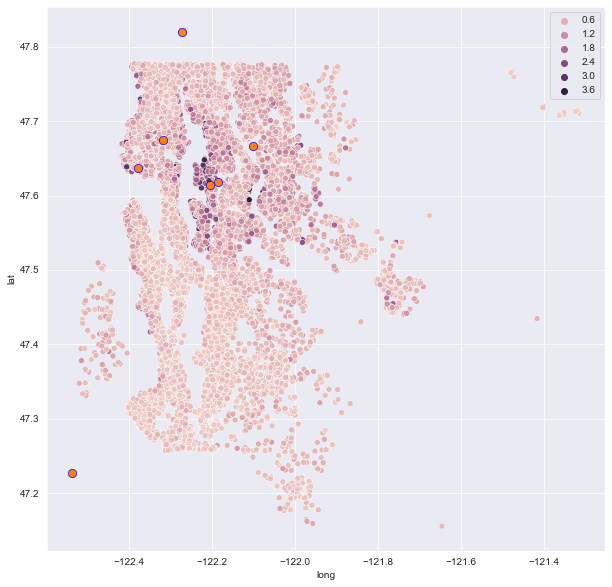

In [12]:

sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
sns.scatterplot(x='longitude', y='latitude', data=df2,marker='o',edgecolor="blue",s=70)
plt.savefig('..\images\LatLongWF.jpg')

In [13]:
!pip install haversine

In [14]:
import haversine as hs
df['coor'] = list(zip(df.lat, df.long))
df2['coor'] = list(zip(df2.latitude, df2.longitude))

In [15]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq,coor
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000,"(47.5112, -122.257)"
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625,"(47.721, -122.319)"
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000,"(47.7379, -122.233)"
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000,"(47.5208, -122.393)"
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000,"(47.6168, -122.045)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500,"(47.6993, -122.346)"
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500,"(47.5107, -122.362)"
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625,"(47.5944, -122.299)"
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500,"(47.5345, -122.069)"


In [16]:
# defining a  function to calculate distance between two locations 
# loc1= location of an existing hotel
# loc2= location of customers

def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [17]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq,coor
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000,"(47.5112, -122.257)"
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625,"(47.721, -122.319)"
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000,"(47.7379, -122.233)"
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000,"(47.5208, -122.393)"
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000,"(47.6168, -122.045)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500,"(47.6993, -122.346)"
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500,"(47.5107, -122.362)"
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625,"(47.5944, -122.299)"
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500,"(47.5345, -122.069)"


In [18]:

# running a loop which will parse customers location one by one to distance from function 
for _,row in df2.iterrows():
    df[row.Name]=df['coor'].apply(lambda x: distance_from(row.coor,x))


In [19]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,condition_div_grade,sqft_living_sq,bathrooms_sq,coor,"365-Bellevue,WA","Whole Foods-Bellevue,WA","Whole Foods-Lynnwood,WA","Whole Foods-Redmond,WA","Whole Foods-Seattle,WA","Whole Foods-University Place,WA"
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.428571,1392400,1.0000,"(47.5112, -122.257)",12.09,13.04,34.35,20.87,16.66,37.92
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0.428571,6604900,5.0625,"(47.721, -122.319)",14.68,15.19,11.53,17.41,10.29,57.26
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.500000,592900,1.0000,"(47.7379, -122.233)",13.95,13.79,9.59,12.68,15.55,61.17
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0.714286,3841600,9.0000,"(47.5208, -122.393)",17.54,18.95,34.46,27.25,12.99,34.36
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.375000,2822400,4.0000,"(47.6168, -122.045)",11.94,10.53,28.29,6.93,24.99,56.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,0.375000,2340900,6.2500,"(47.6993, -122.346)",14.24,15.03,14.49,18.71,7.29,54.39
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,0.375000,5336100,6.2500,"(47.5107, -122.362)",16.49,17.83,35.03,26.15,14.11,34.13
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,0.428571,1040400,0.5625,"(47.5944, -122.299)",7.43,8.90,25.15,16.87,7.54,44.54
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,0.375000,2560000,6.2500,"(47.5345, -122.069)",13.45,12.76,35.21,14.87,25.78,49.03


In [20]:
distance_to_closest_whole_foods = [df.iloc[i,30:-1].values.min() for i in range(len(df))]

In [21]:
df['Closest_WF'] = distance_to_closest_whole_foods
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living_sq,bathrooms_sq,coor,"365-Bellevue,WA","Whole Foods-Bellevue,WA","Whole Foods-Lynnwood,WA","Whole Foods-Redmond,WA","Whole Foods-Seattle,WA","Whole Foods-University Place,WA",Closest_WF
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1392400,1.0000,"(47.5112, -122.257)",12.09,13.04,34.35,20.87,16.66,37.92,12.09
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,6604900,5.0625,"(47.721, -122.319)",14.68,15.19,11.53,17.41,10.29,57.26,10.29
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,592900,1.0000,"(47.7379, -122.233)",13.95,13.79,9.59,12.68,15.55,61.17,9.59
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,3841600,9.0000,"(47.5208, -122.393)",17.54,18.95,34.46,27.25,12.99,34.36,12.99
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,2822400,4.0000,"(47.6168, -122.045)",11.94,10.53,28.29,6.93,24.99,56.93,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,2340900,6.2500,"(47.6993, -122.346)",14.24,15.03,14.49,18.71,7.29,54.39,7.29
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,5336100,6.2500,"(47.5107, -122.362)",16.49,17.83,35.03,26.15,14.11,34.13,14.11
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,1040400,0.5625,"(47.5944, -122.299)",7.43,8.90,25.15,16.87,7.54,44.54,7.43
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,2560000,6.2500,"(47.5345, -122.069)",13.45,12.76,35.21,14.87,25.78,49.03,12.76
